# Thyroid disease data analysis A to Z

- The purpose of this notebook is to classify thyroid diseases based on clinical data via machine learning. 

- UCI thyroid dataset is used for analysis, in which there are 3 disease classes(normal, hyper-, hypo-) and clinical features such as thyroid hormone levels. 

- It turns out that simple machine learning model achieve accuracy above 99%.

- The dataset is from https://archive.ics.uci.edu/ml/datasets/thyroid+disease .

Script below loads useful libraries and set custom style.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

## Part 1. Dataset I/O

The dataset is messy and contains a couple of dissimilar sub-datasets. In particular, feature sets and class labeling are not unified.

Below is tree diagram of dataset folder.

```
📦uci_thyroid
 ┣ 📂costs
 ┃ ┣ 📜ann-thyroid.cost
 ┃ ┣ 📜ann-thyroid.delay
 ┃ ┣ 📜ann-thyroid.expense
 ┃ ┣ 📜ann-thyroid.group
 ┃ ┣ 📜ann-thyroid.README
 ┃ ┗ 📜Index
 ┣ 📜allbp.data
 ┣ 📜allbp.names
 ┣ 📜allbp.test
 ┣ 📜allhyper.data
 ┣ 📜allhyper.names
 ┣ 📜allhyper.test
 ┣ 📜allhypo.data
 ┣ 📜allhypo.names
 ┣ 📜allhypo.test
 ┣ 📜allrep.data
 ┣ 📜allrep.names
 ┣ 📜allrep.test
 ┣ 📜ann-Readme         💡
 ┣ 📜ann-test.data      💡
 ┣ 📜ann-thyroid.names  💡
 ┣ 📜ann-train.data     💡
 ┣ 📜dis.data
 ┣ 📜dis.names
 ┣ 📜dis.test
 ┣ 📜HELLO
 ┣ 📜hypothyroid.data
 ┣ 📜hypothyroid.names
 ┣ 📜Index
 ┣ 📜new-thyroid.data
 ┣ 📜new-thyroid.names
 ┣ 📜sick-euthyroid.data
 ┣ 📜sick-euthyroid.names
 ┣ 📜sick.data
 ┣ 📜sick.names
 ┣ 📜sick.test
 ┣ 📜thyroid.theory
 ┣ 📜thyroid0387.data
 ┗ 📜thyroid0387.names
 ```


Referring to literatures and considering the size of sub-datasets, it seems best to use "ann-train.data" and "ann-test.data".

As meaning of columns and class labels are not self-contained in those files, the following articles are referred to.

```
[1] Leila Baccour, *Amended fused TOPSIS-VIKOR for classification (ATOVIC) applied to some UCI data sets*, Expert Systems with Applications, Volume 99, 2018, Pages 115-125, ISSN 0957-4174, https://doi.org/10.1016/j.eswa.2018.01.025.

[2] Hosseinzadeh, M., Ahmed, O.H., Ghafour, M.Y. et al. *A multiple multilayer perceptron neural network with an adaptive learning algorithm for thyroid disease diagnosis in the internet of medical things*. J Supercomput 77, 3616–3637 (2021). https://doi.org/10.1007/s11227-020-03404-w
```

List of variables are:

`age`, `sex`, `on thyroxine`, `query on thyroxine`, `on antithyroid medication`, `sick`, `pregnant`, 

`thyroid surgery`, `I131 treatment`, `query hypothyroid`, `query hyperthyroid`, `lithium`, `goitre`, `tumor`, `hypopituitary`, `psych`, 

`TSH`, `T3`, `TT4`, `T4U`, `FTI`

In addition, meaning of some variable names are as follows.

- `TSH`, `T3`, `TT4`, `T4U`, `FTI`: numbers related to hormones. 

    - `TSH`(Thyroid Stimulating Hormone): this hormone is released from pituitary and acts on thyroid to accelerate metabolism.

    - Others are related to hormones released from thyroid.

- `age` ranges from 0 to 1. Maybe the actual age was divided by 100 or normalized by min and max.

This dataset is easy to read by pandas.

In [2]:
input_path_thyroid = '../../input/uci_thyroid'
col_names = [
    'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
    'psych', 'TSH', 'T3', 'TT4', 'T4U', 
    'FTI'
]
class_names = ['normal', 'hyper', 'hypo']
df_train = pd.read_csv(
    f'{input_path_thyroid}/ann-train.data', header=None, names=col_names+['class'],
    delim_whitespace=True
)
df_test = pd.read_csv(
    f'{input_path_thyroid}/ann-test.data', header=None, names=col_names+['class'],
    delim_whitespace=True
)

## Part 2. Exploratory Data Analysis (abbr. EDA)

Data observation is now in order. 

### 2-1. basic statistics

In [3]:
print(f'shape of train set: {df_train.shape}, shape of test set: {df_test.shape}')
print(f'number of duplicated rows: {df_train.duplicated().sum()}')
print(f'number of missing values: {df_train.isna().sum().sum()}')

shape of train set: (3772, 22), shape of test set: (3428, 22)
number of duplicated rows: 63
number of missing values: 0


Duplicated rows are dropped from train set. 

In [4]:
df_train = df_train.drop_duplicates()
X_train, y_train = df_train.iloc[:, :-1], df_train['class']
X_test,  y_test  =  df_test.iloc[:, :-1],  df_test['class']

Data types of each column: 

- continuous variables: `age`, `TSH`, `T3`, `TT4`, `T4U`, `FTI`

- boolean variables: `sex`, `on thyroxine`, `query on thyroxine`, `on antithyroid medication`, `sick`, `pregnant`, `thyroid surgery`, `I131 treatment`, `query hypothyroid`, `query hyperthyroid`, `lithium`, `goitre`, `tumor`, `hypopituitary`, `psych`

In [5]:
df_train.dtypes

age                          float64
sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
class                          int64
dtype: object

### 2-2. histograms

We produce figure twice; first class-agnostically, second class-wise.

In case of class-wise histograms, density is plotted in place of frequency for comparison across different classes.

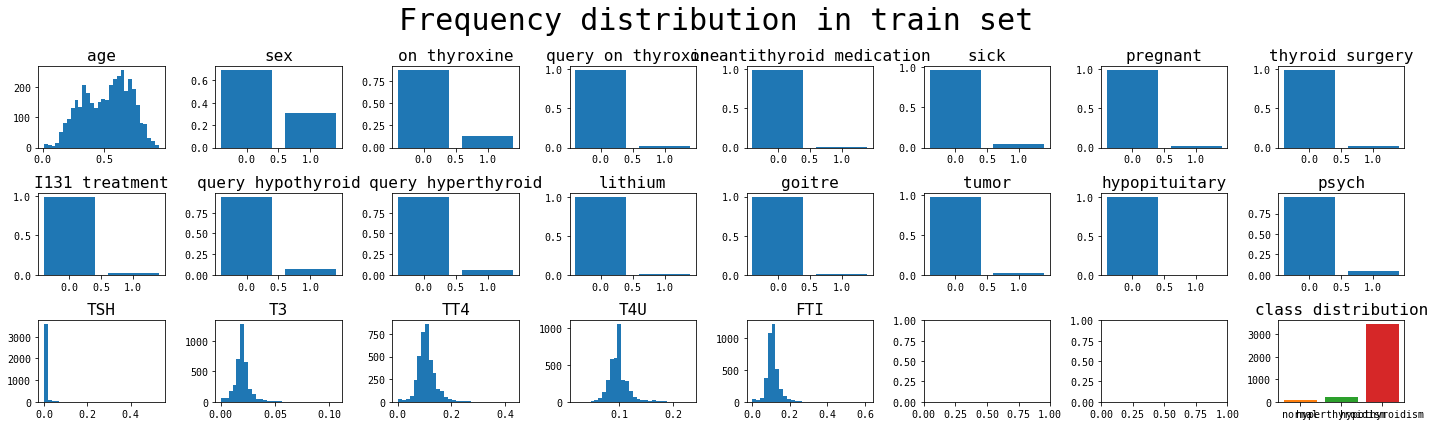

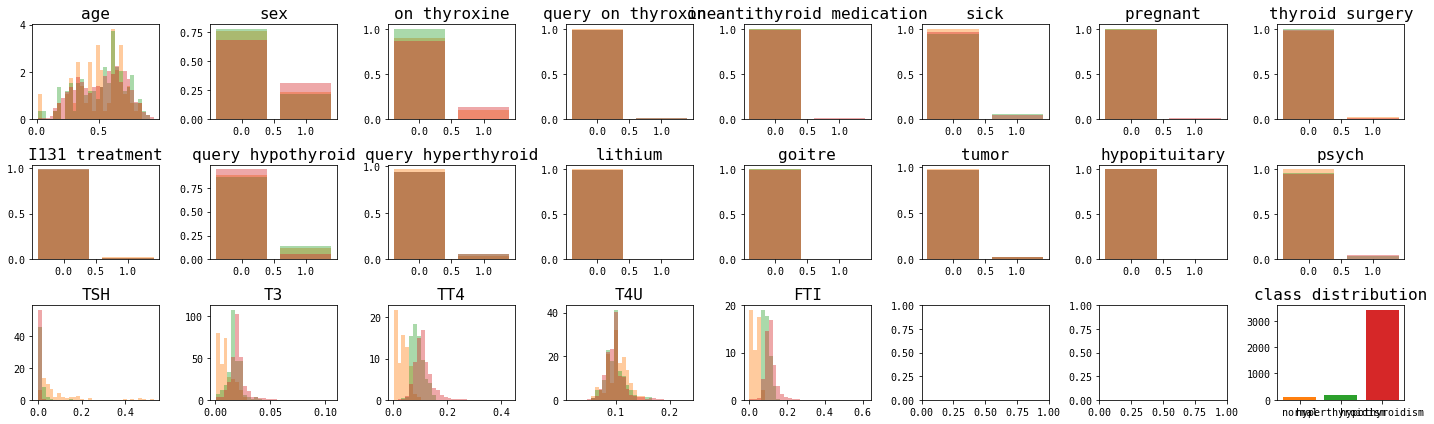

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(20, 6))
axs = axs.ravel()
for num, name in enumerate(col_names):
    ax = axs[num]
    ser = df_train[name]
    _, bins = np.histogram(ser, bins=30)
    if name in ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']:
        ax.hist(ser, bins=bins, color='C0')
    else:
        ax.bar(np.sort(ser.unique()), ser.value_counts(normalize=True).sort_index(), color='C0')
    ax.set_title(name, fontsize=16)

ax = axs[-1]
for j in range(1, 1+3):
    ax.bar([j], [(df_train['class'] == j).sum()], color=f'C{j}')
ax.set_xticks([1, 2, 3]); ax.set_xticklabels(['normal', 'hyperthyroidism', 'hypothyroidism'])
ax.set_title('class distribution', fontsize=16)

fig.suptitle('Frequency distribution in train set', fontsize=30)
plt.tight_layout()
plt.show(); plt.close()

fig, axs = plt.subplots(nrows=3, ncols=8, figsize=(20, 6))
axs = axs.ravel()
for num, name in enumerate(col_names):
    ax = axs[num]
    _, bins = np.histogram(df_train[name], bins=30)
    for cls in range(1, 3+1):
        ser = df_train.loc[df_train['class'] == cls, name]
        if name in ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']:
            ax.hist(ser, bins=bins, density=True, color=f'C{cls}', alpha=0.4)
        else:
            ax.bar(np.sort(ser.unique()), ser.value_counts(normalize=True).sort_index(), color=f'C{cls}', alpha=0.4)
    ax.set_title(name, fontsize=16)

ax = axs[-1]
for j in range(1, 1+3):
    ax.bar([j], [(df_train['class'] == j).sum()], color=f'C{j}')
ax.set_xticks([1, 2, 3]); ax.set_xticklabels(['normal', 'hyperthyroidism', 'hypothyroidism'])
ax.set_title('class distribution', fontsize=16)

# fig.suptitle('Frequency distribution in train set', fontsize=30)
plt.tight_layout()
plt.show(); plt.close()

And below are detailed observation for concerning points.

In [7]:
print(df_train['hypopituitary'].value_counts())
print(df_train['class'].value_counts(normalize=True))

0    3708
1       1
Name: hypopituitary, dtype: int64
3    0.923429
2    0.051496
1    0.025074
Name: class, dtype: float64


So we have found that:

- Class distribution is far skewed. According to [1], something better than nothing should achieve accuracy higher than 90%.

- Most binary variables are skewed as well. 

    - Especially, only ONE sample has `hypopituitary` value 1. Therefore this variables will not used.

- Almost all continuous variables are nearly normally distributed. Only one case, distribution of `TSH` is far from normal. Therefore, `TSH` will be power-transformed.

- A couple of continuous variables seems useful for classification. Therefore, elementary model will work.

In [8]:
del df_train['hypopituitary'], df_test['hypopituitary']
del X_train['hypopituitary'], X_test['hypopituitary']

### 2-3. correlation plots

What about correlation between two variables?

First we draw scatterplot for continuous variables.

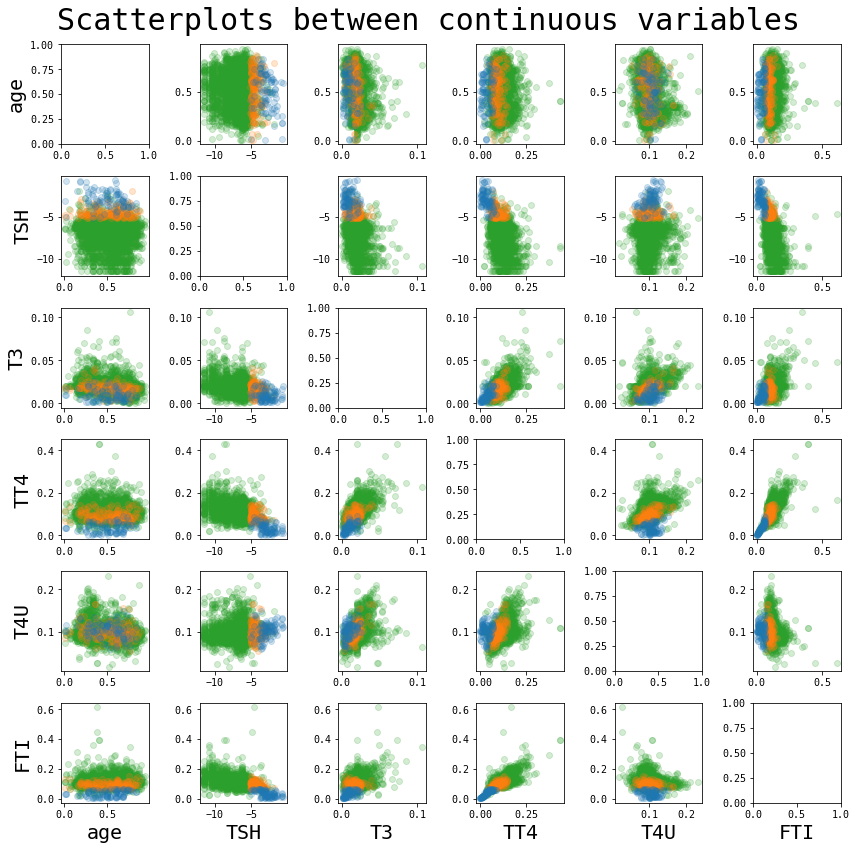

In [9]:
import itertools

col_names_conti = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
vecs = [df_train[name] for name in col_names_conti]
vecs[1] = np.log(1e-5+vecs[1])

fig, axs = plt.subplots(nrows=len(vecs), ncols=len(vecs), figsize=(12, 12))
for i, j, k in itertools.product(range(len(vecs)), range(len(vecs)), range(3, 0, -1)):
    ax = axs[j, i]
    mask = df_train['class'] == k
    i == j or ax.scatter(vecs[i][mask], vecs[j][mask], color=f'C{k-1}', alpha=0.2)
    if j+1 == len(col_names_conti):
        ax.set_xlabel(col_names_conti[i], fontsize=20)
    if i == 0:
        ax.set_ylabel(col_names_conti[j], fontsize=20)

fig.suptitle('Scatterplots between continuous variables', fontsize=30)

plt.tight_layout()
plt.show(); plt.close()

And by calculating Spearman correlation, we consider ordinal correlation between all pairs of variables.

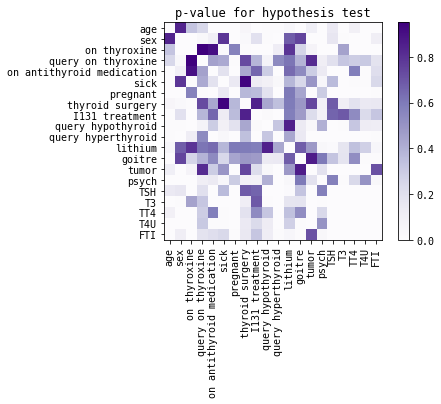

In [10]:
from scipy.stats import spearmanr
res = spearmanr(X_train)
img = plt.imshow(res.pvalue, cmap='Purples')
plt.colorbar(img)

plt.title('p-value for hypothesis test')
plt.xticks(np.arange(X_train.shape[1]), labels=X_train.columns, rotation=90)
plt.yticks(np.arange(X_train.shape[1]), labels=X_train.columns)
plt.show(); plt.close()

Higher p-values occurs when it comes to boolean variables. This is explained by severe imbalance. 

In other words, even though correlation turns out to be strong between boolean variables and other, we cannot consider one of the two useless.

EDA ends here, but there must be other possible exploratory analysis which is helpful.

## Part 3. Trying Simple Models

Scikit-learn provides various machine learning models. 

By trying those models we may achieve enough performance, or at least set up baseline of performance.

Performance is measured by (average of) accuracy score over (stratified) 5-fold cross validation.

Every random seed is fixed (to 42) for reproducibility.

### 3-1. logistic regression



In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    PowerTransformer(),
    LogisticRegression(
        random_state=42
    )
)

y_oof = np.empty_like(y_train)
for num, (train_idxs, val_idxs) in enumerate(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train)):
    X_tr, X_val, y_tr, y_val = X_train.iloc[train_idxs], X_train.iloc[val_idxs], y_train.iloc[train_idxs], y_train.iloc[val_idxs]
    model.fit(X_tr, y_tr)
    acc_tr, acc_val = 1e2*accuracy_score(y_tr, model.predict(X_tr)), 1e2*accuracy_score(y_val , model.predict(X_val))
    print(f'Fold #{num+1}: {acc_tr:.3f}% on train set, {acc_val:.3f}% on validation set')
    y_oof[val_idxs] = model.predict(X_val)
print(f'5-fold cv score {1e2*accuracy_score(y_train, y_oof):.3f}%')

Fold #1: 98.753% on train set, 98.248% on validation set
Fold #2: 98.652% on train set, 98.248% on validation set
Fold #3: 98.652% on train set, 98.383% on validation set
Fold #4: 98.686% on train set, 98.787% on validation set
Fold #5: 98.720% on train set, 98.111% on validation set
5-fold cv score 98.355%


This looks like a satisfactory result, but we should recall how far skewed the dataset was.

We see the confusion matrix for oof(out-of-fold) prediction.

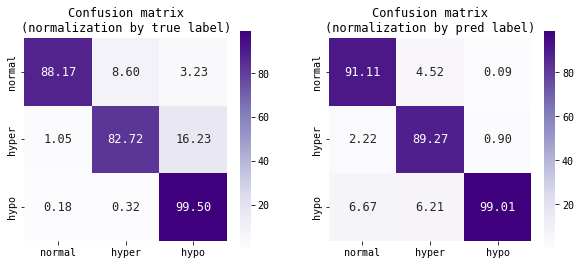

In [12]:
from sklearn.metrics import confusion_matrix
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

ax = axs[0]
sns.heatmap(
    1e2*confusion_matrix(y_train, y_oof, normalize='true'), fmt='.2f',
    cmap='Purples', annot=True, annot_kws={'fontsize': 12}, square=True,
    xticklabels=class_names, yticklabels=class_names, ax=ax
)
ax.set_title('Confusion matrix\n(normalization by true label)', fontsize=12)

ax = axs[1]
sns.heatmap(
    1e2*confusion_matrix(y_train, y_oof, normalize='pred'), fmt='.2f',
    cmap='Purples', annot=True, annot_kws={'fontsize': 12}, square=True,
    xticklabels=class_names, yticklabels=class_names, ax=ax
)
ax.set_title('Confusion matrix\n(normalization by pred label)', fontsize=12)


plt.show(); plt.close()

We can find precision and recall score above 80%. 

As an data analyst (rather than a physician), I cannot say whether this is enough. Anyway the analysis will be continued.

It is omitted here, but tuning parameter or regularizing did not ameliorate performance significantly. So we continue trying other models.

### 3-2. support vector machine

In [13]:
from sklearn.svm import SVC

model = make_pipeline(
    PowerTransformer(),
    SVC(
        random_state=42
    )
)

y_oof = np.empty_like(y_train)
for num, (train_idxs, val_idxs) in enumerate(StratifiedKFold(n_splits=5).split(X_train, y_train)):
    X_tr, X_val, y_tr, y_val = X_train.iloc[train_idxs], X_train.iloc[val_idxs], y_train.iloc[train_idxs], y_train.iloc[val_idxs]
    model.fit(X_tr, y_tr)
    acc_tr, acc_val = 1e2*accuracy_score(y_tr, model.predict(X_tr)), 1e2*accuracy_score(y_val , model.predict(X_val))
    print(f'Fold #{num+1}: {acc_tr:.3f}% on train set, {acc_val:.3f}% on validation set')
    y_oof[val_idxs] = model.predict(X_val)
print(f'5-fold cv score {1e2*accuracy_score(y_train, y_oof):.3f}%')

Fold #1: 98.618% on train set, 97.844% on validation set
Fold #2: 98.686% on train set, 97.709% on validation set
Fold #3: 98.888% on train set, 97.978% on validation set
Fold #4: 98.854% on train set, 97.574% on validation set
Fold #5: 98.888% on train set, 98.246% on validation set
5-fold cv score 97.870%


### 3-3. decision tree

Since tree models are irrelevant to scale, `PowerTransformer` is dropped from pipeline.

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    random_state=42
)

y_oof = np.empty_like(y_train)
for num, (train_idxs, val_idxs) in enumerate(StratifiedKFold(n_splits=5).split(X_train, y_train)):
    X_tr, X_val, y_tr, y_val = X_train.iloc[train_idxs], X_train.iloc[val_idxs], y_train.iloc[train_idxs], y_train.iloc[val_idxs]
    model.fit(X_tr, y_tr)
    acc_tr, acc_val = 1e2*accuracy_score(y_tr, model.predict(X_tr)), 1e2*accuracy_score(y_val , model.predict(X_val))
    print(f'Fold #{num+1}: {acc_tr:.3f}% on train set, {acc_val:.3f}% on validation set')
    y_oof[val_idxs] = model.predict(X_val)
print(f'5-fold cv score {1e2*accuracy_score(y_train, y_oof):.3f}%')

Fold #1: 100.000% on train set, 99.865% on validation set
Fold #2: 100.000% on train set, 100.000% on validation set
Fold #3: 100.000% on train set, 99.730% on validation set
Fold #4: 100.000% on train set, 100.000% on validation set
Fold #5: 100.000% on train set, 99.595% on validation set
5-fold cv score 99.838%


Surprisingly, decision tree performed well without any tuning.

At this point it seems reasonable to fine-tune tree model for better result.

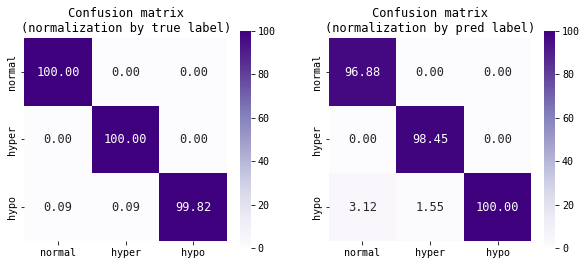

In [15]:
from sklearn.metrics import confusion_matrix
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

ax = axs[0]
sns.heatmap(
    1e2*confusion_matrix(y_train, y_oof, normalize='true'), fmt='.2f',
    cmap='Purples', annot=True, annot_kws={'fontsize': 12}, square=True,
    xticklabels=class_names, yticklabels=class_names, ax=ax
)
ax.set_title('Confusion matrix\n(normalization by true label)', fontsize=12)

ax = axs[1]
sns.heatmap(
    1e2*confusion_matrix(y_train, y_oof, normalize='pred'), fmt='.2f',
    cmap='Purples', annot=True, annot_kws={'fontsize': 12}, square=True,
    xticklabels=class_names, yticklabels=class_names, ax=ax
)
ax.set_title('Confusion matrix\n(normalization by pred label)', fontsize=12)

plt.show(); plt.close()

## Part 4. Model Optimization and Explanation

### 4-1. optimization by genetic algorithm

Now I will stick to decision tree, and still there is possibility of performance increase by hyperparameter tuning.

Along many tuning methods such as grid search, random search, etc., *genetic algorithm* is used.

This algorithm, roughly speaking, encodes hyperparameters as *gene* of each model and let those models reproduce, mutate and undergo natural selection. Consequently, 'the fittest survivor' model are choosen as optimally tuned one.

In [16]:
from sklearn_genetic import GASearchCV, space

param_grid = {
    'max_depth': space.Integer(4, 10, random_state=42),
    'min_samples_split': space.Continuous(1e-4, 1e-2, distribution='log-uniform', random_state=42),
    'min_samples_leaf': space.Continuous(1e-4, 1e-2, distribution='log-uniform', random_state=42),
}

ga_cv = GASearchCV(
    DecisionTreeClassifier(random_state=42),
    cv=3,
    param_grid=param_grid,
    population_size=20,
    generations=20,
)

ga_cv.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	20    	0.995511	0.00194282 	0.998112   	0.993259   
1  	40    	0.997627	0.000494101	0.998112   	0.995956   
2  	40    	0.997964	0.000199425	0.998112   	0.997304   
3  	40    	0.997951	0.000528236	0.998112   	0.995686   
4  	40    	0.998112	1.11022e-16	0.998112   	0.998112   
5  	40    	0.998112	1.11022e-16	0.998112   	0.998112   
6  	40    	0.998112	1.11022e-16	0.998112   	0.998112   
7  	40    	0.998112	1.11022e-16	0.998112   	0.998112   
8  	40    	0.998099	5.87294e-05	0.998112   	0.997843   
9  	40    	0.998112	1.11022e-16	0.998112   	0.998112   
10 	40    	0.998112	1.11022e-16	0.998112   	0.998112   
11 	40    	0.998099	5.87294e-05	0.998112   	0.997843   
12 	40    	0.998112	1.11022e-16	0.998112   	0.998112   
13 	40    	0.998112	1.11022e-16	0.998112   	0.998112   
14 	40    	0.998085	0.000117506	0.998112   	0.997573   
15 	40    	0.998085	0.000117506	0.998112   	0.997573   
16 	40    	0.998085	0.000117506	0.998112   	0.99

GASearchCV(estimator=DecisionTreeClassifier(max_depth=7,
                                            min_samples_leaf=0.0001542960100551973,
                                            min_samples_split=0.0001542960100551973,
                                            random_state=42),
           generations=20,
           param_grid={'max_depth': <sklearn_genetic.space.space.Integer object at 0x0000020894580F10>,
                       'min_samples_leaf': <sklearn_genetic.space.space.Continuous object at 0x0000020891CC86A0>,
                       'min_samples_split': <sklearn_genetic.space.space.Continuous object at 0x0000020894580B20>},
           population_size=20, return_train_score=True)

This is not different from what we obtained without fine-tuning.

### 4-2. explaining model

Besides performance, comprehension of the model is of interest.

Fortunately, it is relatively easy to intepret tree model, by just observing its decision rule(=tree) itself.

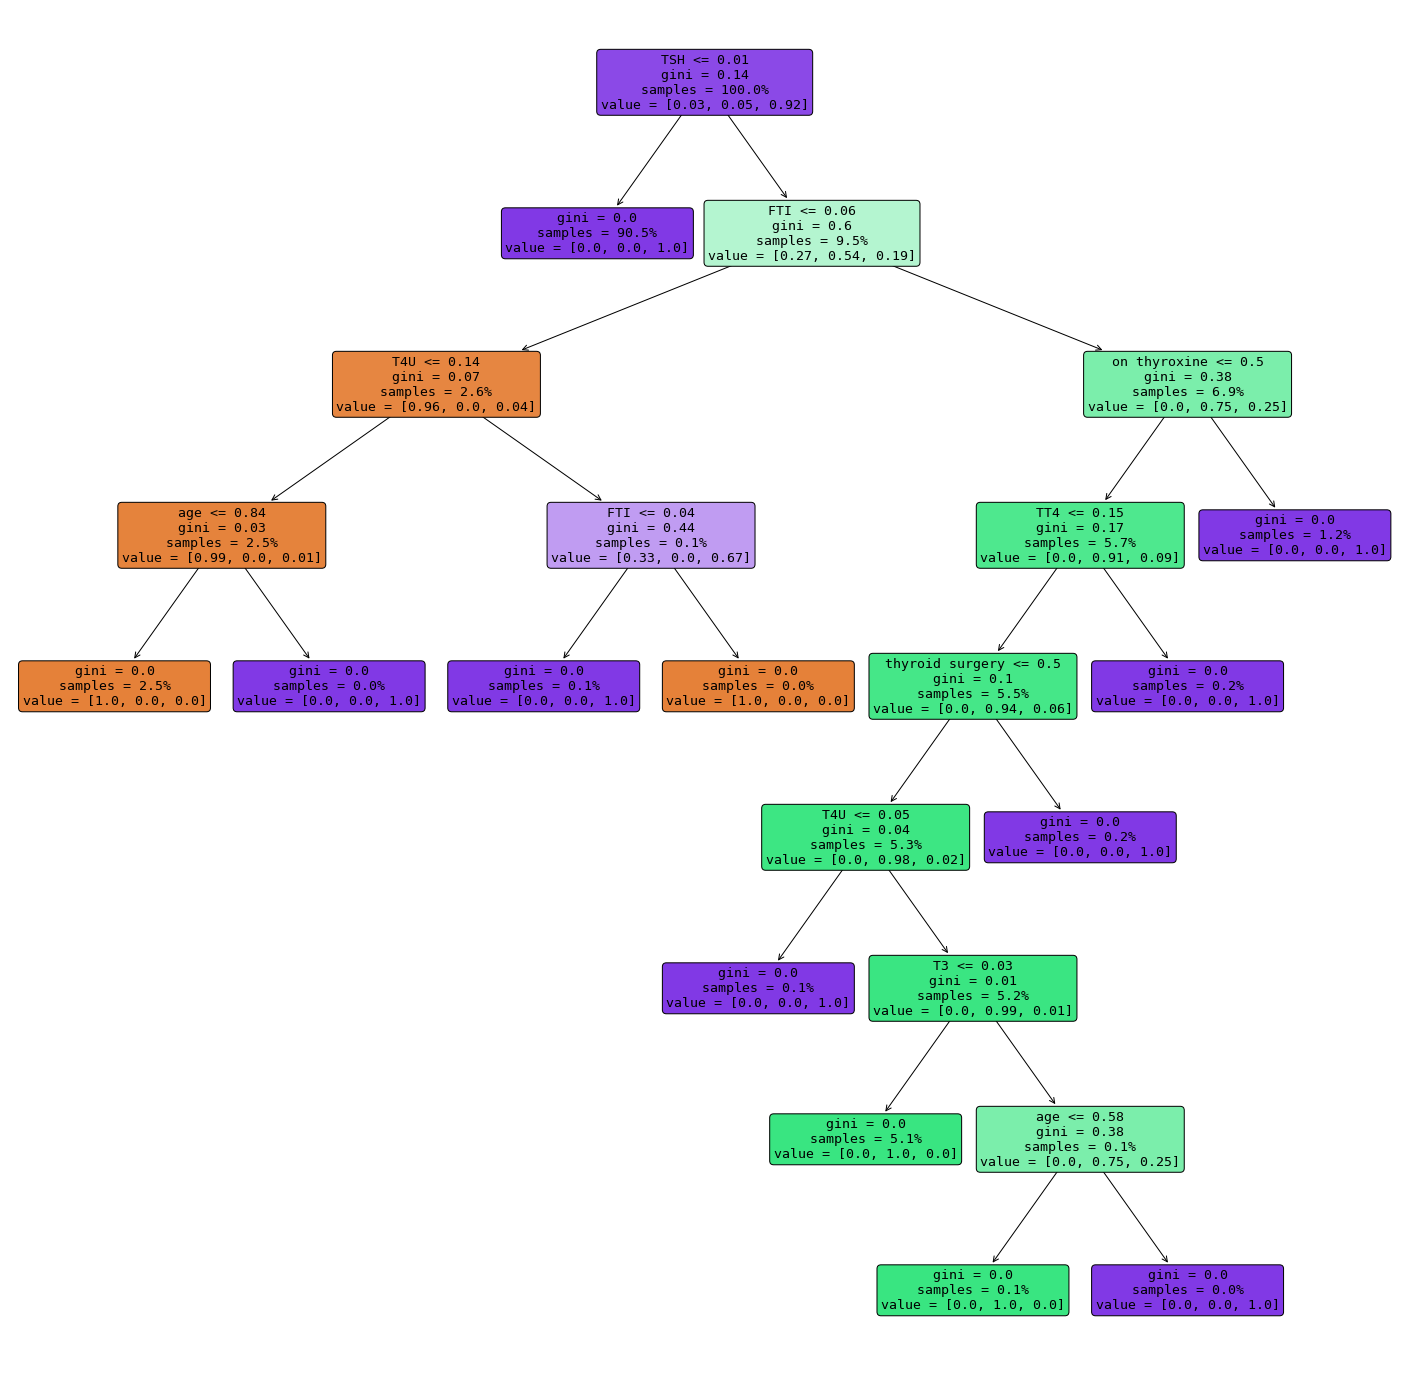

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 25))
annots = plot_tree(
    model,
    feature_names=X_train.columns,
    proportion=True,
    filled=True,
    rounded=True,
    precision=2,
)
plt.show(); plt.close()

Finally, let us evaluate the model on test set. 

Other popular scores are also calculated. AUROC is not applicable for multiclass classification.

In [18]:
from sklearn.metrics import precision_score, recall_score

print('Metrics on test set:')
print(f'accuracy score: {1e2*accuracy_score(y_test, model.predict(X_test)):.3f}%')
print(f'precision score: {1e2*precision_score(y_test, model.predict(X_test), average="macro"):.3f}%')
print(f'recall score: {1e2*recall_score(y_test, model.predict(X_test), average="macro"):.3f}%')

Metrics on test set:
accuracy score: 99.067%
precision score: 92.953%
recall score: 95.917%


Accuracy is slightly dropped, but not that much.

## Part 5. Discussion

### 5-1. high performance ?

It was almost toy model which attained accuracy over 99%. 

Probably, thyroid disease diagnosis is a straightforward task for physicians whenever those variables are provided.

Indeed, anyone can just follow a few upper splits of decision tree to determine whether a patient is ill or not.

Even before such algorithm is estabilished by computer, I expect medical experts would have discovered such knowledge by themselves.

### 5-2. significance of this report

Was this just an toy exercise for machine learning learner? Well, I think there is something more.

1. Real-world data was used here. So the data analysis pipeline involved domain survey, data I/O, preprocessing in the beginning, as well as discussion and observation in the end. 

Such toils are neither pleasant nor mathematical, but both indispensable and critical in non-artificial data analysis.

2. Even though the diagnosis rule is simple and already known by clinicians, it is noteworthy that the rule is reachable by automated algorithm.

As a result, we can quantify the goodness of rule by accuracy scores and feature importance by some metrics.

Or, we are also able to measure trade-off between conciseness versus performance of model by, for example, truncating tree from bottom, or strengthening regularization if it were different algorithm.

### 5-3. conclusion

We have found appropriately tuned tree model is able to serve as machine diagnoser for thyroid diseases. 

